array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.42069842,
        -0.61493744,  0.68806755],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -1.02222705,
         1.33645936,  1.15479381],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.0933178 ,
        -0.5320456 , -0.08721662],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.71315642,
        -0.3167053 , -0.94374574],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.37545069,
         0.09812139,  0.16343266],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.3777909 ,
        -0.15779865,  2.53250922]])

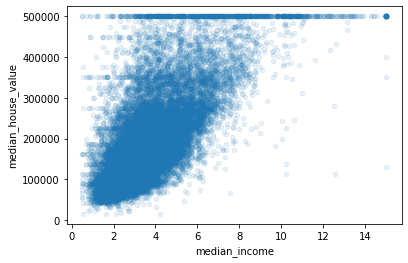

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the dataset
housing = pd.read_csv("housing.csv")

#making testsets 
from sklearn.model_selection import train_test_split as test
from sklearn.model_selection import StratifiedShuffleSplit


trainset,testset = test(housing,test_size = 0.2 , random_state = 42)
housing["income_cat"] = pd.cut(housing["median_income"],bins= [0,1.5,3.0,4.5,6. ,np.inf],
                              labels=[1,2,3,4,5])

#sampling 
split = StratifiedShuffleSplit(n_splits= 1 , test_size = 0.2 , random_state = 42)

for train_index, test_index in split.split(housing,housing["income_cat"]):
    stratified_train_set = housing.loc[train_index]
    stratified_test_set = housing.loc[test_index]
    
for set_ in (stratified_train_set, stratified_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    
    
#looking for correlations between attributes
copy = stratified_train_set.copy()

from pandas.plotting import scatter_matrix
attributesCorrelate = ["median_house_value","median_income","total_rooms","housing_median_age"]
#scatter_matrix(copy[attributesCorrelate],figsize = (12,12))
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)
median = copy["total_bedrooms"].median()


#handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
copy_num = copy.drop("ocean_proximity",axis = 1 )
imputer.fit(copy_num)
x = imputer.transform(copy_num)
filledCopy = pd.DataFrame(x,columns = copy_num.columns)

#handling text attributes
from sklearn.preprocessing import OneHotEncoder
housing_cat = copy[["ocean_proximity"]]
cat_encoder = OneHotEncoder()
y = cat_encoder.fit_transform(housing_cat)
len(y.toarray())


In [6]:
clear
